# importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

# Business Problem Understading

Your task here is to make use of historical records to build a model for predicting a No-Show for
an appointement given appoint details, medical history and demographic details of the customer

# Loading DataSet

In [29]:
df_med=pd.read_csv('datasets/medical_history.csv')
df_dmg=pd.read_csv('datasets/demographic_details.csv')
df_train=pd.read_csv('datasets/train.csv')
df_test=pd.read_csv('datasets/test_share.csv')

In [30]:
df_dmg.shape,df_med.shape,df_test.shape,df_train.shape

((62299, 5), (62299, 5), (10854, 5), (99490, 6))

In [31]:
#Checking top five recoreds
df_test.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received
0,7.223289e+12,5640433,2016-04-29T10:43:14Z,2016-04-29T00:00:00Z,0
1,8.632298e+14,5616091,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,1
2,4.438587e+14,5637909,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,0
3,4.179932e+13,5638018,2016-04-29T07:37:45Z,2016-04-29T00:00:00Z,0
4,3.647762e+13,5614045,2016-04-25T10:01:13Z,2016-04-29T00:00:00Z,1


# Data Preprocessing

### Concatinate medical_history and demographic_details dataset with train and test dataset

#### 1. Test merge with both dataset

In [32]:
dff=pd.merge(df_med,df_dmg,on='PatientId',how='inner')
dff_test=pd.merge(dff,df_test,on='PatientId',how='inner')

In [33]:
dff_test

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,AppointmentID,ScheduledDay,AppointmentDay,SMS_received
0,7.223289e+12,0,0,0,0,F,46,DA PENHA,0,5640433,2016-04-29T10:43:14Z,2016-04-29T00:00:00Z,0
1,8.632298e+14,0,0,0,0,M,13,CONQUISTA,0,5616091,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,1
2,4.438587e+14,0,0,0,0,M,6,CONQUISTA,0,5637909,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,0
3,4.438587e+14,0,0,0,0,M,6,CONQUISTA,0,5676948,2016-05-09T17:01:17Z,2016-05-10T00:00:00Z,0
4,4.179932e+13,0,0,0,0,M,2,NOVA PALESTINA,0,5638018,2016-04-29T07:37:45Z,2016-04-29T00:00:00Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10849,4.493388e+14,0,0,0,0,M,38,RESISTÊNCIA,0,5785949,2016-06-08T07:51:33Z,2016-06-08T00:00:00Z,0
10850,5.526929e+12,0,0,0,0,M,18,RESISTÊNCIA,0,5778312,2016-06-06T15:23:10Z,2016-06-08T00:00:00Z,0
10851,5.526929e+12,0,0,0,0,M,18,RESISTÊNCIA,0,5773376,2016-06-06T07:08:36Z,2016-06-06T00:00:00Z,0
10852,2.423178e+12,0,0,0,0,F,6,RESISTÊNCIA,0,5780308,2016-06-07T07:52:47Z,2016-06-07T00:00:00Z,0


In [37]:
dff_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10854 entries, 0 to 10853
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       10854 non-null  float64            
 1   Hipertension    10854 non-null  int64              
 2   Diabetes        10854 non-null  int64              
 3   Alcoholism      10854 non-null  int64              
 4   Handcap         10854 non-null  int64              
 5   Gender          10854 non-null  object             
 6   Age             10854 non-null  int64              
 7   Neighbourhood   10854 non-null  object             
 8   Scholarship     10854 non-null  int64              
 9   AppointmentID   10854 non-null  int64              
 10  ScheduledDay    10854 non-null  datetime64[ns, UTC]
 11  AppointmentDay  10854 non-null  datetime64[ns, UTC]
 12  SMS_received    10854 non-null  int64              
dtypes: datetime64[ns, UTC](2), floa

we have 13 columns and 10854 records in test dataframe after merging the medical history and demographical data

In [15]:
dff_test.columns

Index(['PatientId', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'AppointmentID',
       'ScheduledDay', 'AppointmentDay', 'SMS_received'],
      dtype='object')

In [22]:
#this is small code for below program is not useful 
cols=dff_test.columns
rcol=['PatientId','AppointmentID']
if 'PatientId' in cols:
        print('aa')

aa


In [26]:
#This function prepocess the data convert columns into date and time , and create seperate column for month and day
#and add in the dataframe and remove the scheduledday and Appoinmentday
def colsep(data,col):
    if data[col].dtypes=='datetime64[ns, UTC]':
            data[col[:-3]+'_month']=data[col].dt.month
            data[col[:-3]+'_day']=data[col].dt.day
def preprocess(data):
    # Changing dtype to datetime
    data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
    data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])
    #cols=data.columns
    scol=['ScheduledDay', 'AppointmentDay']
    rcol=['PatientId','AppointmentID','ScheduledDay', 'AppointmentDay']
   # if  in cols column name 
    for col in scol:
        if col=='ScheduledDay':
            colsep(data,col)
        if col=='AppointmentDay':
            colsep(data,col)
        
    data.drop(rcol,axis=1,inplace=True)    
    

In [39]:
preprocess(dff_test)

In [40]:
dff_test

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,0,0,0,0,F,46,DA PENHA,0,0,4,29,4,29
1,0,0,0,0,M,13,CONQUISTA,0,1,4,25,4,29
2,0,0,0,0,M,6,CONQUISTA,0,0,4,29,4,29
3,0,0,0,0,M,6,CONQUISTA,0,0,5,9,5,10
4,0,0,0,0,M,2,NOVA PALESTINA,0,0,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10849,0,0,0,0,M,38,RESISTÊNCIA,0,0,6,8,6,8
10850,0,0,0,0,M,18,RESISTÊNCIA,0,0,6,6,6,8
10851,0,0,0,0,M,18,RESISTÊNCIA,0,0,6,6,6,6
10852,0,0,0,0,F,6,RESISTÊNCIA,0,0,6,7,6,7


#### 2. Train merge with both dataset

In [41]:
#dff_train=pd.merge(df_med,df_dmg,on='PatientId',how='inner')
dff_train=pd.merge(dff,df_train,on='PatientId',how='inner')

In [42]:
preprocess(dff_train)

In [43]:
dff_train

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
1,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
2,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
3,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
4,0,0,0,0,F,8,PONTAL DE CAMBURI,0,0,No,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99485,0,0,0,0,F,41,MARIA ORTIZ,0,0,No,6,8,6,8
99486,0,0,0,0,M,2,ANTÔNIO HONÓRIO,0,0,No,6,8,6,8
99487,0,0,0,0,F,50,MARIA ORTIZ,0,1,No,4,27,6,7
99488,0,0,0,0,F,42,MARIA ORTIZ,0,1,No,5,3,6,7


### Checking for missing value

In [77]:
dff_train.isnull().sum()

Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
Gender               0
Age                  0
Neighbourhood        0
Scholarship          0
SMS_received         0
No-show              0
Scheduled_month      0
Scheduled_day        0
Appointment_month    0
Appointment_day      0
dtype: int64

### Checking for duplicate values

In [78]:
dff_train.duplicated().sum()

548

In [79]:
#dropping duplicate values
dff_train.drop_duplicates(inplace=True)

# One Hot Encoding

In [80]:
dff_train['Neighbourhood'].nunique()

48

In [81]:
a=dff_train['Neighbourhood'].value_counts()

In [82]:
a>500

Others                 True
JARDIM CAMBURI         True
MARIA ORTIZ            True
RESISTÊNCIA            True
JARDIM DA PENHA        True
ITARARÉ                True
CENTRO                 True
TABUAZEIRO             True
SANTA MARTHA           True
JESUS DE NAZARETH      True
SANTO ANTÔNIO          True
BONFIM                 True
CARATOÍRA              True
JABOUR                 True
SANTO ANDRÉ            True
SÃO PEDRO              True
ILHA DO PRÍNCIPE       True
NOVA PALESTINA         True
DA PENHA               True
ANDORINHAS             True
ROMÃO                  True
GURIGICA               True
MARUÍPE                True
BELA VISTA             True
SÃO JOSÉ               True
SÃO CRISTÓVÃO          True
ILHA DE SANTA MARIA    True
FORTE SÃO JOÃO         True
REDENÇÃO               True
JOANA D´ARC            True
SÃO BENEDITO           True
CONSOLAÇÃO             True
CRUZAMENTO             True
SANTA TEREZA           True
PRAIA DO SUÁ           True
SANTOS DUMONT       

In [83]:
# create list of index which in 
a= a[a>598].index

In [84]:
dff_train['Neighbourhood'].value_counts()>500

Others                 True
JARDIM CAMBURI         True
MARIA ORTIZ            True
RESISTÊNCIA            True
JARDIM DA PENHA        True
ITARARÉ                True
CENTRO                 True
TABUAZEIRO             True
SANTA MARTHA           True
JESUS DE NAZARETH      True
SANTO ANTÔNIO          True
BONFIM                 True
CARATOÍRA              True
JABOUR                 True
SANTO ANDRÉ            True
SÃO PEDRO              True
ILHA DO PRÍNCIPE       True
NOVA PALESTINA         True
DA PENHA               True
ANDORINHAS             True
ROMÃO                  True
GURIGICA               True
MARUÍPE                True
BELA VISTA             True
SÃO JOSÉ               True
SÃO CRISTÓVÃO          True
ILHA DE SANTA MARIA    True
FORTE SÃO JOÃO         True
REDENÇÃO               True
JOANA D´ARC            True
SÃO BENEDITO           True
CONSOLAÇÃO             True
CRUZAMENTO             True
SANTA TEREZA           True
PRAIA DO SUÁ           True
SANTOS DUMONT       

In [85]:
dff_train['Neighbourhood']=np.where(dff_train['Neighbourhood'].isin(a),dff_train['Neighbourhood'],'Others')

In [86]:
dff_train

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
2,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
4,0,0,0,0,F,8,Others,0,0,No,4,29,4,29
5,0,0,0,0,F,8,Others,0,0,Yes,4,25,5,19
6,1,1,0,0,F,56,JARDIM DA PENHA,0,0,No,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,0,0,0,0,F,14,MARIA ORTIZ,0,0,No,6,8,6,8
99485,0,0,0,0,F,41,MARIA ORTIZ,0,0,No,6,8,6,8
99487,0,0,0,0,F,50,MARIA ORTIZ,0,1,No,4,27,6,7
99488,0,0,0,0,F,42,MARIA ORTIZ,0,1,No,5,3,6,7


In [87]:
dff_train['Neighbourhood'].nunique()

48

In [88]:
dff_train

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,1,0,0,0,F,62,JARDIM DA PENHA,0,0,No,4,29,4,29
2,0,0,0,0,M,56,JARDIM DA PENHA,0,0,No,4,29,4,29
4,0,0,0,0,F,8,Others,0,0,No,4,29,4,29
5,0,0,0,0,F,8,Others,0,0,Yes,4,25,5,19
6,1,1,0,0,F,56,JARDIM DA PENHA,0,0,No,4,29,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,0,0,0,0,F,14,MARIA ORTIZ,0,0,No,6,8,6,8
99485,0,0,0,0,F,41,MARIA ORTIZ,0,0,No,6,8,6,8
99487,0,0,0,0,F,50,MARIA ORTIZ,0,1,No,4,27,6,7
99488,0,0,0,0,F,42,MARIA ORTIZ,0,1,No,5,3,6,7


In [71]:
#dff_train1.drop('Neighbourhood_',axis=1,inplace=True)

In [89]:
dff_train1=pd.get_dummies(dff_train,drop_first=True)

In [92]:
dff_train1

,Hipertension,Diabetes,Alcoholism,Handcap,Age,Scholarship,SMS_received,Scheduled_month,Scheduled_day,Appointment_month,...,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_VILA RUBIM,No-show_Yes
0,1,0,0,0,62,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,56,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,8,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,8,0,0,4,25,5,...,0,0,0,0,0,0,0,0,0,1
6,1,1,0,0,56,0,0,4,29,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,0,0,0,0,14,0,0,6,8,6,...,0,0,0,0,0,0,0,0,0,0
99485,0,0,0,0,41,0,0,6,8,6,...,0,0,0,0,0,0,0,0,0,0
99487,0,0,0,0,50,0,1,4,27,6,...,0,0,0,0,0,0,0,0,0,0
99488,0,0,0,0,42,0,1,5,3,6,...,0,0,0,0,0,0,0,0,0,0


#  Splitiing the Dataset into X and y

In [93]:
X=dff_train1.drop(columns=['No-show_Yes'])
y=dff_train1['No-show_Yes']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((73584, 59), (18396, 59), (73584,), (18396,))

# Modeling

## LogisticRegression

In [95]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [96]:
ypred_test=lr_model.predict(X_test)
ypred_train=lr_model.predict(X_train)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr_model,X,y,cv=3,scoring='accuracy')
sc_roc=cross_val_score(lr_model,X,y,cv=3,scoring='roc_auc')
print("Cross Validation",scores," means",scores.mean())
print("ROC_AUC",scores," roc",scores.mean())
print(lr_model.score(X_test,y_test))
print(lr_model.score(X_train,y_train))

Cross Validation [0.787182   0.78669276 0.77579909]  means 0.7832246140465319
ROC_AUC [0.787182   0.78669276 0.77579909]  roc 0.7832246140465319
0.7853881278538812
0.7866383996520983


In [43]:
import statsmodels.api as sm
X_new = sm.add_constant(X)
model = sm.Logit(y,X_new).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\Users\PSK\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:            No-show_Yes   No. Observations:                92528
Model:                          Logit   Df Residuals:                    92468
Method:                           MLE   Df Model:                           59
Date:                Tue, 06 Jun 2023   Pseudo R-squ.:                     inf
Time:                        13:47:15   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2836      0.131     -2.167      0.030      -0.540      -0.027
Hipertension                         -0.1092      0.027     -4

C:\Users\PSK\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [45]:
[model.summary()]

[<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:            No-show_Yes   No. Observations:                92528
 Model:                          Logit   Df Residuals:                    92468
 Method:                           MLE   Df Model:                           59
 Date:                Tue, 06 Jun 2023   Pseudo R-squ.:                     inf
 Time:                        13:48:59   Log-Likelihood:                   -inf
 converged:                       True   LL-Null:                        0.0000
 Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------------------------------------------------------------
 const                                -0.2836      0.131     -2.167      0.030      -0.540      -0.027
 

# AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada = AdaBoostClassifier()
gdc = GradientBoostingClassifier()

In [47]:
ada.fit(X_train,y_train)
print('Train Score',ada.score(X_train,y_train))
print('Test Scoer ',ada.score(X_test,y_test))
score_acc = cross_val_score(ada,X,y,cv=5,scoring='accuracy')
score_auc = cross_val_score(ada,X,y,cv=5,scoring='roc_auc') 
print(score_acc,'Accuracy ',score_acc.mean())
print(score_auc,'Auc_score',score_auc.mean())

Train Score 0.789603090972954
Test Scoer  0.7864476386036962
[0.78628553 0.79006809 0.78828488 0.78276142 0.78157255] Accuracy  0.7857944918833221
[0.62952208 0.67649917 0.65702482 0.64740022 0.68329653] Auc_score 0.6587485626477994


# GradientBoostingClassifier

In [48]:
gdc.fit(X_train,y_train)
print('Train Score',gdc.score(X_train,y_train))
print('Test Scoer ',gdc.score(X_test,y_test))
score_acc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='accuracy')
score_auc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='roc_auc') 
print(score_acc_gdc,'Accuracy ',score_acc_gdc.mean())
print(score_auc_gdc,'Auc_score',score_auc_gdc.mean())

Train Score 0.7911837021426062
Test Scoer  0.7887171728088188
[0.78974387 0.78925754 0.78893332 0.78962443 0.78962443] Accuracy  0.7894367151070103
[0.65911285 0.7061266  0.68368584 0.66797861 0.72092529] Auc_score 0.6875658375895304


# XGBClassifier

In [49]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('Train Score',xgb.score(X_train,y_train))
print('Test Scoer ',xgb.score(X_test,y_test))
score_acc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='accuracy')
score_auc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb,'Accuracy ',score_acc_xgb.mean())
print(score_auc_xgb,'Auc_score',score_auc_xgb.mean())

Train Score 0.8089486909297235
Test Scoer  0.7887712093375122
[0.77758565 0.78347563 0.78169242 0.77730343 0.78524723] Accuracy  0.7810608726970927
[0.66908824 0.71430459 0.69944422 0.67442773 0.71568679] Auc_score 0.6945903108610818


# Hyperparameter

# AdaBoostClassifier

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={'n_estimators':[1,2,4,10,15,20,30,50]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2, 4, 10, 15, 20, 30, 50]},
             scoring='accuracy')

In [51]:
grid.best_params_

{'n_estimators': 1}

In [52]:
#final Adaboosting model
ada=AdaBoostClassifier(n_estimators=1)
ada.fit(X_train,y_train)
print('Train Score',ada.score(X_train,y_train))
print('Test Scoer ',ada.score(X_test,y_test))
score_acc = cross_val_score(ada,X,y,cv=5,scoring='accuracy')
score_auc = cross_val_score(ada,X,y,cv=5,scoring='roc_auc') 
print(score_acc,'Accuracy ',score_acc.mean())
print(score_auc,'Auc_score',score_auc.mean())

Train Score 0.7906027937640161
Test Scoer  0.7880146979358046
[0.79006809 0.79006809 0.79006809 0.79011078 0.79011078] Accuracy  0.7900851639637063
[0.56604264 0.59659519 0.58937297 0.58834059 0.59598183] Auc_score 0.5872666428054827


# GradientBoostingClassifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier()
param_grid={'n_estimators':[10,20,25,26,27,30],'learning_rate':list(np.linspace(0.1,1,10).round(2))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.4, 'n_estimators': 30}


In [54]:
# Final Gradientboosting
gdc=GradientBoostingClassifier(learning_rate=0.4,n_estimators=30)
gdc.fit(X_train,y_train)
print('Train Score',gdc.score(X_train,y_train))
print('Test Scoer ',gdc.score(X_test,y_test))
score_acc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='accuracy')
score_auc_gdc = cross_val_score(gdc,X,y,cv=5,scoring='roc_auc') 
print(score_acc_gdc,'Accuracy ',score_acc_gdc.mean())
print(score_auc_gdc,'Auc_score',score_auc_gdc.mean())

Train Score 0.7916160060522547
Test Scoer  0.7889873554522857
[0.78633957 0.78898736 0.78952772 0.78784112 0.78919211] Accuracy  0.7883775751997651
[0.65365678 0.70577468 0.68565707 0.66501281 0.71855359] Auc_score 0.6857309860963416


#  XGBClassifier

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[0,1,2,3,10,20,30,35,40,50],
           'max_depth':[1,2,3,4,5,6],
            'gamma':[0,0.15,0.3,0.5,1]
           }
grid=GridSearchCV(estimator,param_grid=param_grid,cv=5,scoring='accuracy',return_train_score=True,verbose=2,n_jobs=-1,refit=True)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'gamma': 0.15, 'max_depth': 5, 'n_estimators': 30}


In [57]:
cv= pd.DataFrame(grid.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.634634,0.020197,0.073358,0.002244,0,1,0,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 0}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
1,0.848112,0.019169,0.075956,0.004145,0,1,1,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 1}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
2,0.957848,0.012588,0.074158,0.004993,0,1,2,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 2}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
3,1.045398,0.009354,0.077156,0.003917,0,1,3,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 3}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
4,1.773980,0.019848,0.080554,0.007140,0,1,10,"{'gamma': 0, 'max_depth': 1, 'n_estimators': 10}",0.790611,0.790611,...,0.790603,0.000007,101,0.790601,0.790601,0.790604,0.790604,0.790604,0.790603,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.364441,0.050467,0.114934,0.013364,1,6,20,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 20}",0.791354,0.791287,...,0.791265,0.000431,22,0.796241,0.795869,0.795957,0.796954,0.796042,0.796213,0.000390
296,15.011569,0.061907,0.126328,0.015861,1,6,30,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 30}",0.790679,0.791354,...,0.790711,0.000559,80,0.797997,0.797828,0.797916,0.799537,0.798659,0.798388,0.000645
297,17.431777,0.096998,0.127927,0.003284,1,6,35,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 35}",0.791489,0.791760,...,0.791008,0.000653,41,0.798926,0.799247,0.799149,0.800517,0.800027,0.799573,0.000600
298,21.918798,1.034243,0.162308,0.019570,1,6,40,"{'gamma': 1, 'max_depth': 6, 'n_estimators': 40}",0.791354,0.791422,...,0.790805,0.000541,75,0.800091,0.800311,0.800449,0.801733,0.801192,0.800755,0.000613


<AxesSubplot:xlabel='param_n_estimators', ylabel='mean_train_score'>

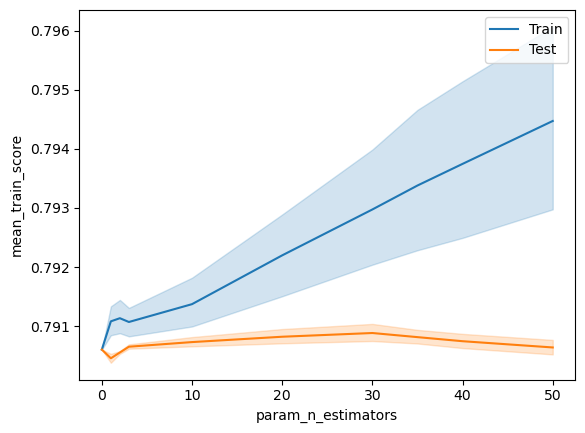

In [58]:
sns.lineplot(x='param_n_estimators',y='mean_train_score',data=cv,label='Train')
sns.lineplot(x='param_n_estimators',y='mean_test_score',data=cv,label='Test')

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_train_score'>

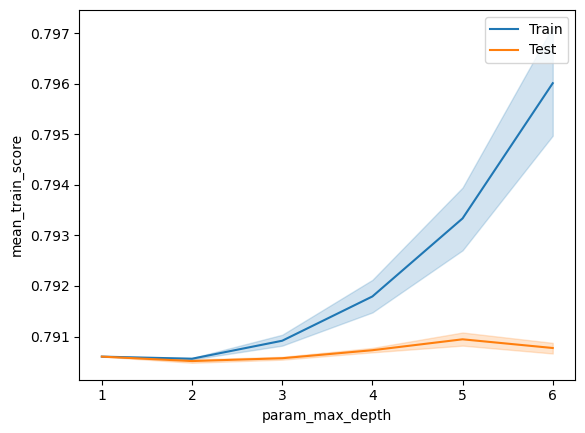

In [59]:
sns.lineplot(x='param_max_depth',y='mean_train_score',data=cv,label='Train')
sns.lineplot(x='param_max_depth',y='mean_test_score',data=cv,label='Test')

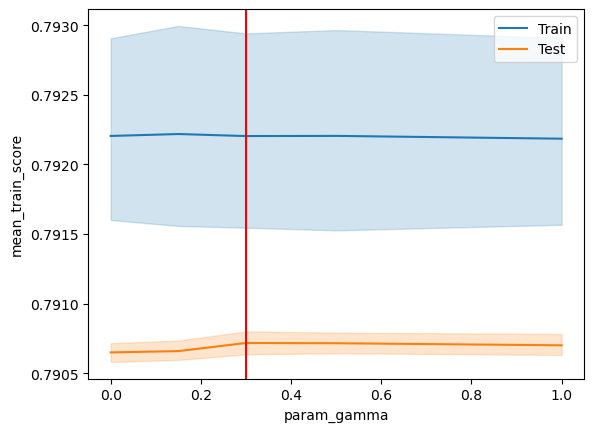

In [60]:
sns.lineplot(x='param_gamma',y='mean_train_score',data=cv,label='Train')
sns.lineplot(x='param_gamma',y='mean_test_score',data=cv,label='Test')
plt.axvline(0.3,color='red')

In [61]:
grid.best_params_,grid.best_score_

({'gamma': 0.15, 'max_depth': 5, 'n_estimators': 30}, 0.7917781177828204)

In [62]:
xgb = XGBClassifier(**grid.best_params_)
xgb1 = XGBClassifier(**{'n_estimators': 40, 'max_depth': 3, 'gamma': 0.3})
xgb.fit(X_train,y_train)
print('Train Score',xgb.score(X_train,y_train))
print('Test Scoer ',xgb.score(X_test,y_test))
score_acc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='accuracy')
score_auc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb,'Accuracy ',score_acc_xgb.mean())
print(score_auc_xgb,'Auc_score',score_auc_xgb.mean())

Train Score 0.7948042473859123
Test Scoer  0.7897438668539933
[0.78796066 0.78871717 0.78736626 0.7858957  0.78935423] Accuracy  0.7878588052516207
[0.67192125 0.71619758 0.694818   0.67643466 0.72246705] Auc_score 0.6963677087650696


In [63]:
xgb1.fit(X_train,y_train)
print('Train Score',xgb1.score(X_train,y_train))
print('Test Scoer ',xgb1.score(X_test,y_test))
score_acc_xgb1 = cross_val_score(xgb1,X,y,cv=5,scoring='accuracy')
score_auc_xgb1 = cross_val_score(xgb1,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb1,'Accuracy ',score_acc_xgb1.mean())
print(score_auc_xgb1,'Auc_score',score_auc_xgb1.mean())

Train Score 0.7907513982329578
Test Scoer  0.7878525883497244
[0.78893332 0.78936561 0.78887928 0.78594974 0.78930019] Accuracy  0.788485628984464
[0.66217454 0.70922059 0.68667948 0.66821795 0.71930633] Auc_score 0.6891197785894198


In [64]:
xgb = XGBClassifier(**grid.best_params_)
xgb1 = XGBClassifier(**{'gamma': 0.15, 'max_depth': 5, 'n_estimators': 30})
xgb.fit(X_train,y_train)
print('Train Score',xgb.score(X_train,y_train))
print('Test Scoer ',xgb.score(X_test,y_test))
score_acc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='accuracy')
score_auc_xgb = cross_val_score(xgb,X,y,cv=5,scoring='roc_auc') 
print(score_acc_xgb,'Accuracy ',score_acc_xgb.mean())
print(score_auc_xgb,'Auc_score',score_auc_xgb.mean())

Train Score 0.7948042473859123
Test Scoer  0.7897438668539933
[0.78796066 0.78871717 0.78736626 0.7858957  0.78935423] Accuracy  0.7878588052516207
[0.67192125 0.71619758 0.694818   0.67643466 0.72246705] Auc_score 0.6963677087650696


# Save the best Model

In [98]:
import pickle

In [99]:
#saving Model in disk
pickle.dump(lr_model,open('patient_model.pkl','wb'))

In [ ]:
#loading Model to compare ther results
reg_model=pickle.load(open('patient_model.pkl','rb'))

In [ ]:
#predicting result
reg_model.predict([[2,9,6]])